In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/Colab Notebooks/Emotion Dataset'

fer2013.csv  light.csv


In [3]:
import keras
import sys, os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import regularizers
from keras.utils.np_utils import to_categorical
import csv
from itertools import islice
from math import ceil
import numpy as np
from keras import regularizers
import pandas as pd
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Emotion Dataset/fer2013.csv')

In [0]:
# Simplify the emotions
l1 = data.loc[data['emotion'] == 0]  # Angry
l2 = data.loc[data['emotion'] == 3]  # Happy
l3 = data.loc[data['emotion'] == 4]  # Sad
l4 = data.loc[data['emotion'] == 6]  # Nuetral

light = pd.concat([l1,l2,l3,l4])

In [6]:
# Fix values
light.emotion.loc[(light['emotion'] == 3)] = 1
light.emotion.loc[(light['emotion'] == 4)] = 2
light.emotion.loc[(light['emotion'] == 6)] = 3

# re-shuffle
light = shuffle(light)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
training_data = light[light['Usage'].isin(['Training'])]
testing_data = light[light['Usage'].isin(['PublicTest'])]


In [8]:
print(training_data.shape)
print(testing_data.shape)

(21005, 3)
(2622, 3)


In [0]:
train_data = training_data.iloc[:,1]
train_labels = training_data.iloc[:,0]
test_data = testing_data.iloc[:,1]
test_labels = testing_data.iloc[:,0]

In [0]:
# convert string into int and normalize data
X_train = []
X_test = []
for row in range(len(train_data)):
  temp = np.fromstring(train_data.iloc[row], dtype=int, sep=" ").reshape((48, 48, 1))
  temp = temp/255.
  temp = np.array(temp)
  X_train.append(temp)
  
for row in range(len(test_data)):
  temp = np.fromstring(test_data.iloc[row], dtype=int, sep=" ").reshape((48, 48, 1))
  temp = temp/255.
  temp = np.array(temp)
  X_test.append(temp)

In [0]:
X_train = np.array(X_train)
Y_train = np.array(train_labels)
X_test = np.array(X_test)
Y_test = np.array(test_labels)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21005, 48, 48, 1)
(21005,)
(2622, 48, 48, 1)
(2622,)


In [0]:
# List of labels
emotion_table = {'0' : 'anger',     # 4953
                 '1' : 'happy',     # 8989
                 '2' : 'sad',       # 6077
                 '3' : 'neutral'}   # 6198

# Setup important information for the model
num_classes = len(emotion_table)
batch_size = 128
epochs = 25

In [0]:
# Labels
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
input_shape = (48, 48, 1)

In [0]:
# Building the network ---------------------------------------------

# Model
def createAndRun(llambda):
   model = models.Sequential()
   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
   model.add(layers.MaxPooling2D((2, 2)))
   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
   model.add(layers.MaxPooling2D((2, 2)))
   model.add(layers.Conv2D(128, (3, 3), activation='relu'))
   model.add(layers.MaxPooling2D((2, 2)))
   model.add(layers.Dropout(0.25))
   model.add(layers.Conv2D(128, (3, 3), activation='relu'))
   model.add(layers.MaxPooling2D((2, 2)))
   model.add(layers.Flatten())
   model.add(layers.Dropout(0.25))
   model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(llambda), activation='relu'))
   model.add(layers.Dropout(0.4))
   model.add(layers.Dense(num_classes, activation='sigmoid'))
   
   # Print summary
   model.summary()
   
   # Compilation
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
   
   # Data pre-processing 
   history = model.fit(X_train, Y_train,
                       batch_size= batch_size,
                       epochs=epochs,
                       verbose=1, 
                       validation_data=(X_test, Y_test))
   
   
   # Save model after training
   model.save('facial_expressions_l2_'+str(llambda)+'.h5')
   
   return history


In [16]:
# Create and run model ---------------------------------------

history1 = createAndRun(0.001)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         


In [17]:
history2 = createAndRun(0.0005)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 128)        

In [18]:
history3 = createAndRun(0.0001)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 128)        

In [0]:
all_history = {'0.001':history1,'0.005':history2,'0.0001':history3}


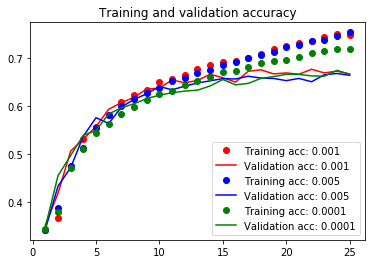

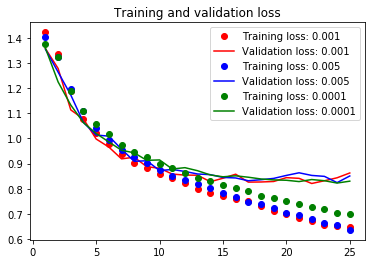

L2 value: 0.001, Accuracy: 0.666666667257712
L2 value: 0.005, Accuracy: 0.6639969483938588
L2 value: 0.0001, Accuracy: 0.6662852779133096


In [20]:
# Create Plots ----------------------------------------------

color = {'0.001':'r','0.005':'b','0.0001':'g'}

for val in color.keys():
   acc = all_history[val].history['acc']
   val_acc = all_history[val].history['val_acc']
   plt.plot(range(1,epochs+1), acc, 'o'+color[val], label='Training acc: '+val)
   plt.plot(range(1,epochs+1), val_acc, color[val], label='Validation acc: '+val)

plt.title('Training and validation accuracy')
plt.legend()

plt.savefig('Training_and_validation_accuracy.png')
plt.figure()



for val in color.keys():
   loss = all_history[val].history['loss']
   val_loss = all_history[val].history['val_loss']
   plt.plot(range(1,epochs+1), loss, 'o'+color[val], label='Training loss: '+val)
   plt.plot(range(1,epochs+1), val_loss, color[val], label='Validation loss: '+val)

plt.title('Training and validation loss')
plt.legend()

plt.savefig('Training_and_validation_loss.png')
plt.show()

# Results
for val in color.keys():
   val_acc = all_history[val].history['val_acc'][-1]
   print('L2 value: ' +str(val) + ', Accuracy: ' + str(val_acc))
